In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Loading flower dataset and precomputed graph edges / sentiment score

In [4]:
flower_data = pd.read_csv("../Data/General/flower_cleaned.csv", error_bad_lines=False, delimiter=";")

In [8]:
flower_data.head(10)

,Flower,Meaning,AfinnScore,SimilarIndex40
0,Acacia,secret love,3,"[145, 181]"
1,Acanthus,art,0,[]
2,Aconite,misanthropy,0,[]
3,Agrimony,thankfulness,0,[]
4,Aloe,grief,-2,"[112, 201, 263, 293]"
5,Almond,promise,1,"[100, 221, 328]"
6,Amaranth (Globe),immortal love,5,"[20, 62, 147, 181, 250]"
7,Amaranth,immortality,0,[]
8,Amaryllis,pride,0,[]
9,Ambrosia,love is reciprocated,3,"[13, 20, 39, 44, 62, 67, 94, 98, 106, 115, 120..."


---
# Testing out NetworkX

In [10]:
import networkx as nx
G = nx.Graph()

In [11]:
G.add_nodes_from(range(0, 10))

In [12]:
G.add_edges_from([(1, 2), (4, 5), (1, 6), (6, 8)])

In [13]:
G.nodes[1]['name'] = "hello"

In [14]:
G.nodes.data()

NodeDataView({0: {}, 1: {'name': 'hello'}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

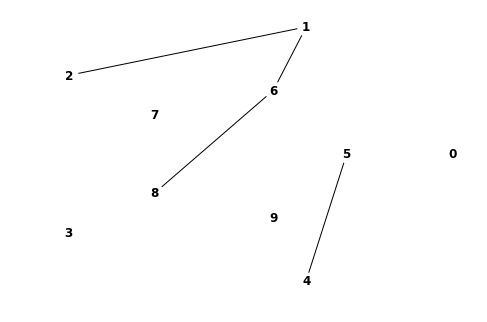

In [50]:
#nx.draw(G, with_labels=True, font_weight='bold')
val_map = {'kind1': 2,'kind2': 2,'kind3': 2,'kind4': 1,'kind5':4,'kind6': 3}
values = [val_map.get(node, 0) for node in G.nodes()]
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', node_color="w", cmap=plt.get_cmap('jet'))#, labels={1: 'flower1'})